# KNN

In [275]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/kc_house_data_clean_knn.csv')
y = df['price']
X = df.drop(['price' , 'zipcode'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)



# On cree un pipeline de proprocessing pour les variables numériques et une autre pour les variables catégorielles
numeric_features = X.columns # on récupère les noms des variables numériques
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.decomposition import PCA

from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')), # imputation des valeurs manquantes
        ])

# on déclare à quelles variables on applique quel transformer

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ]
)


#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
from sklearn.neighbors import KNeighborsRegressor
knn_4 = KNeighborsRegressor(n_neighbors=3 , weights='distance' , p=1)
pipe = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_4)
])

In [276]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

0.997181434685495

In [277]:
# Faire des prédictions sur le jeu de test
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score


y_pred = trained_pipe.predict(X_test)

# Calculer les métriques d'évaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE : {mae}')
print(f'R2 : {r2}')

MAE : 5683.778145627438
R2 : 0.997181434685495


In [287]:
predict_lr_X = trained_pipe.predict(X_test)
df_model = X_test.copy()
df_model['price'] = y_test
df_model['predict_price'] = predict_lr_X.round(0)
df_model = df_model.iloc[:len(df_model)]
df_model.head(60)

,bedrooms,bathrooms,surface,floors,waterfront,view,condition,grade,price_per_sqft,price,predict_price
15427,4,2.50,2550,1.0,0,0,3,8,108.823529,277500.0,277682.0
5076,3,1.75,1540,1.0,0,0,2,8,319.772727,492450.0,491594.0
5537,3,1.75,1510,1.0,0,0,4,8,341.807947,516130.0,519613.0
6508,4,2.50,2150,1.0,0,0,3,7,193.022791,414999.0,417429.0
10574,3,2.50,2280,2.0,0,0,3,8,274.122807,625000.0,625559.0
7459,4,2.50,2890,2.0,0,2,3,8,198.961938,575000.0,570787.0
14297,3,1.00,1030,1.0,0,0,3,7,373.786408,385000.0,388709.0
3798,2,1.00,1040,1.0,0,0,4,7,401.923077,418000.0,418994.0
13804,3,2.50,2210,2.0,0,0,3,7,192.760181,426000.0,431519.0
9838,3,2.50,2670,2.0,0,0,3,9,161.048689,430000.0,426362.0


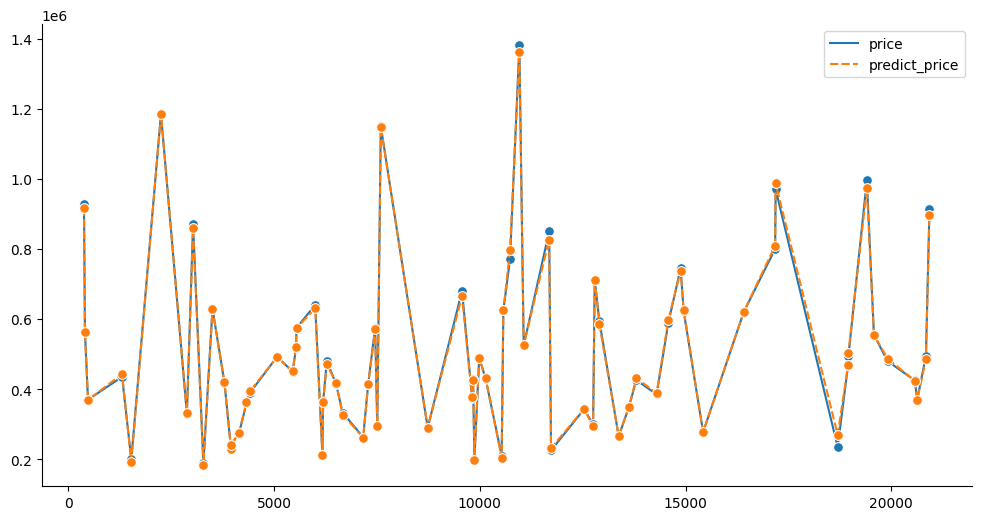

In [279]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_model[['price', 'predict_price']].head(70), ax=ax, marker='o', markersize=7)
sns.despine()

plt.show()

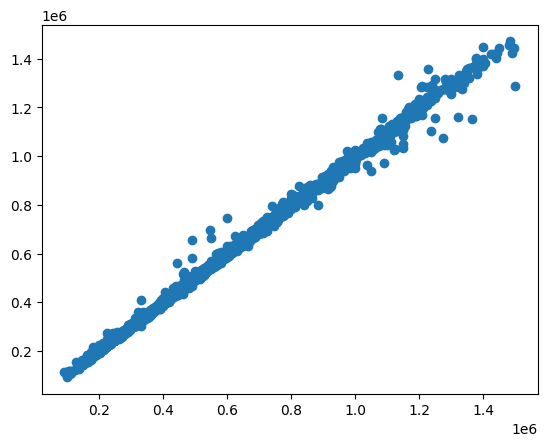

In [286]:
plt.scatter(y_test, predict_lr_X)